<a href="https://colab.research.google.com/github/maribel1985/Challenge_TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

He sido contratado como asistente de análisis de datos en Telecom X y formaré parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir del análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

# Extracción de datos

In [107]:
# Importar las bibliotecas que se van a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# API
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos directamente desde la API y los convierto a un DataFrame
df_telecom = pd.read_json(api_url)



#🔧 Transformación
Conocer el conjunto de datos

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

In [109]:
# Mostrar las primeras filas del DataFrame con .head()
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [110]:
# Información general con .info()
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [111]:
# Tipo de datos por cada columna usando .dtypes
df_telecom.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [147]:
# Visualizar las columnas con .columns
df_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [146]:
# Extraer los datos de los diccionarios y normalizarlos
customer_data = pd.json_normalize(df_telecom['customer'])
phone_data = pd.json_normalize(df_telecom['phone'])
internet_data = pd.json_normalize(df_telecom['internet'])
account_data = pd.json_normalize(df_telecom['account'])

In [148]:
# Concatenar nueva columna con la original
df_telecom_expanded = pd.concat([df_telecom[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)

In [149]:
# Mostrar 5 primeros resultados del nuevo DataFrame
df_telecom_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [150]:
# Información de los datos: columnas, cantidad de datos nulos y tipo de dato
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [151]:
# Visualizar los nombres de las columnas del nuevo Dataframe
df_telecom_expanded.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## **Comprobación de incoherencias en los datos**

In [152]:
# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(df_telecom_expanded.isnull().sum())


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [153]:
# Verificar filas duplicadas
print("\nNúmero de filas duplicadas:")
print(df_telecom_expanded.duplicated().sum())


Número de filas duplicadas:
0


In [154]:
# Verificar valores únicos en columnas categóricas para identificar inconsistencias
columnas_categoricas = df_telecom_expanded.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas:")
for col in columnas_categoricas:
    print(f"- {col}: {df_telecom_expanded[col].unique()}")


Valores únicos en columnas categóricas:
- customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
- Churn: ['No' 'Yes' '']
- gender: ['Female' 'Male']
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No internet service']
- StreamingTV: ['Yes' 'No' 'No internet service']
- StreamingMovies: ['No' 'Yes' 'No internet service']
- Contract: ['One year' 'Month-to-month' 'Two year']
- PaperlessBilling: ['Yes' 'No']
- PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
- Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## **Manejo de inconsistencias**

In [155]:
# Verificar el tipo de datos de las columnas numéricas y buscar posibles errores de formato
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
print("\nTipos de datos de columnas numéricas:")
print(df_telecom_expanded[columnas_numericas].dtypes)


Tipos de datos de columnas numéricas:
tenure               int64
Charges.Monthly    float64
Charges.Total       object
dtype: object


In [156]:
# Convertir los tipos de dato de la columna 'Charges.Total' a numéricos
df_telecom_expanded['Charges.Total'] = pd.to_numeric(df_telecom_expanded['Charges.Total'], errors='coerce')

# Identificar datos nulos en la columna 'Charges.Total'
invalid_charges_total = df_telecom_expanded[df_telecom_expanded['Charges.Total'].isna()]

if not invalid_charges_total.empty:
    print("\nFilas con valores inválidos en la columna 'Charges.Total (convertidos a nulos)':")
    print(invalid_charges_total)
    print(f"\nNúmero de filas con datos nulos: {len(invalid_charges_total)}")

    # Eliminar filas con datos nulos en 'Charges.Total'
    df_telecom_expanded.dropna(subset=['Charges.Total'], inplace=True)
    print(f"\nSe eliminaron {len(invalid_charges_total)} filas con valores nulos en 'Charges.Total'.")

print("\nTipo de dato en la columna 'Charges.Total'después de la conversión y la eliminación de datos nulos:")
print(df_telecom_expanded['Charges.Total'].dtype)

print("\nInformación del DataFrame después de eliminar las filas:")
df_telecom_expanded.info()


Filas con valores inválidos en la columna 'Charges.Total (convertidos a nulos)':
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     

In [157]:
df_telecom_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [158]:
# Resumen estadístico de columnas numéricas para detectar valores atípicos o errores
print("\nEstadísticas descriptivas de columnas numéricas: \n")
print(df_telecom_expanded[columnas_numericas].describe())


Estadísticas descriptivas de columnas numéricas: 

            tenure  Charges.Monthly  Charges.Total
count  7256.000000      7256.000000    7256.000000
mean     32.395535        64.755423    2280.634213
std      24.558067        30.125739    2268.632997
min       1.000000        18.250000      18.800000
25%       9.000000        35.450000     400.225000
50%      29.000000        70.300000    1391.000000
75%      55.000000        89.900000    3785.300000
max      72.000000       118.750000    8684.800000


## **Crear columna de 'Cuentas diarias'**

In [159]:
df_telecom_expanded['Cuentas_Diarias'] = round(df_telecom_expanded['Charges.Monthly'] / 30, 2)
df_telecom_expanded


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


## **Estandarización y transformación de datos**

In [160]:
# Estandarizar datos categóricos, convertir 'Yes'/'No' a 1/0
binary_map = {'Yes': 1, 'No': 0}

# Limpiar columna 'Churn'
df_telecom_expanded['Churn'] = df_telecom_expanded['Churn'].replace('', pd.NA)

# Aplicar transformación a columnas binarias
cols_sino = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in cols_sino:
    df_telecom_expanded[col] = df_telecom_expanded[col].map(binary_map)
    # Fill NaN values after mapping with 0 (assuming empty or unmapped means the 'No' case)
    df_telecom_expanded[col] = df_telecom_expanded[col].fillna(0)

In [161]:
# Caso especial para la columna 'gender' (Female/Male)
if 'gender' in df_telecom_expanded.columns:
    df_telecom_expanded['gender'] = df_telecom_expanded['gender'].map({'Female': 1, 'Male': 0})

print("Datos limpiados y transformados correctamente")
print(f"Dataset final: {df_telecom_expanded.shape}")

Datos limpiados y transformados correctamente
Dataset final: (7256, 22)


In [162]:
# Verificación
print(df_telecom_expanded[['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].head())

   Churn  gender  Partner  Dependents  PhoneService  PaperlessBilling
0    0.0       1        1           1             1                 1
1    0.0       0        0           0             1                 0
2    1.0       0        0           0             1                 1
3    1.0       0        1           0             1                 1
4    1.0       1        1           0             1                 1


#📊 Carga y análisis

## **Análisis descriptivo**

In [163]:
# Uso Describe para generar las estadísticas descriptivas de las variables numéricas
df_telecom_expanded.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7256.000000,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.494350,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.437332,0.500003,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


## **Distribución de evasión**
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

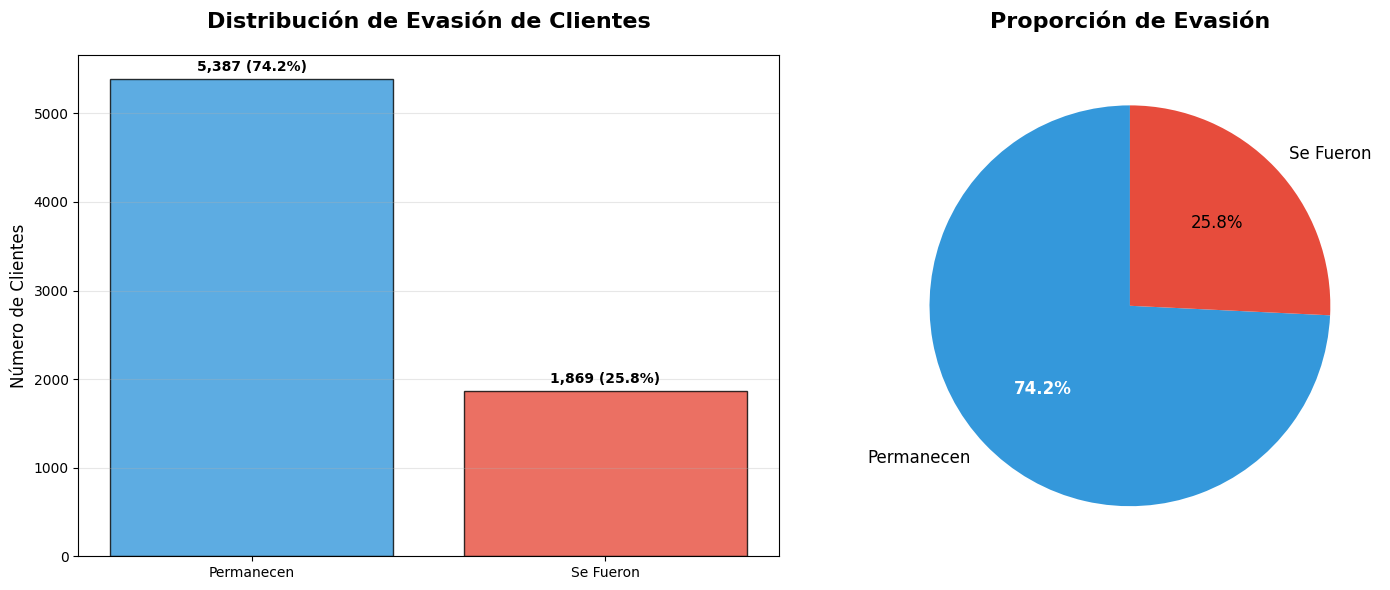

<Figure size 640x480 with 0 Axes>

RESUMEN DE EVASIÓN DE CLIENTES
📊 Total de clientes analizados: 7,256
✅ Clientes que permanecen: 5,387 (74.2%)
❌ Clientes que se fueron: 1,869 (25.8%)
🎯 Tasa de evasión: 25.8%


In [164]:
# GRÁFICA 1: Distribución de Evasión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calcular conteos y porcentajes
conteo_churn = df_telecom_expanded['Churn'].value_counts().sort_index()
etiquetas = ['Permanecen', 'Se Fueron']
colores = ['#3498db', '#e74c3c']

# Gráfico de barras
bars = ax1.bar(etiquetas, conteo_churn.values, color=colores, alpha=0.8, edgecolor='black', linewidth=1)
ax1.set_title('Distribución de Evasión de Clientes', fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Número de Clientes', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores y porcentajes en las barras
total_clientes = len(df_telecom_expanded)
for i, (bar, valor) in enumerate(zip(bars, conteo_churn.values)):
  porcentaje = (valor / total_clientes) * 100
  ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(conteo_churn.values)*0.01,
           f'{valor:,} ({porcentaje:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
wedges, texts, autotexts = ax2.pie(conteo_churn.values, labels=etiquetas, colors=colores,
                                   autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax2.set_title('Proporción de Evasión', fontsize=16, fontweight='bold', pad=20)

# Mejorar el estilo del gráfico de pastel
for autotext in autotexts:
   autotext.set_color('white')
   autotext.set_fontweight('bold')

   plt.tight_layout()
   plt.show()

# Mostrar estadísticas clave
tasa_evasion = (conteo_churn[1] / total_clientes) * 100
print("=" * 50)
print("RESUMEN DE EVASIÓN DE CLIENTES")
print("=" * 50)
print(f"📊 Total de clientes analizados: {total_clientes:,}")
print(f"✅ Clientes que permanecen: {conteo_churn[0]:,} ({100-tasa_evasion:.1f}%)")
print(f"❌ Clientes que se fueron: {conteo_churn[1]:,} ({tasa_evasion:.1f}%)")
print(f"🎯 Tasa de evasión: {tasa_evasion:.1f}%")


## **Recuento de evasión por variables categóricas**

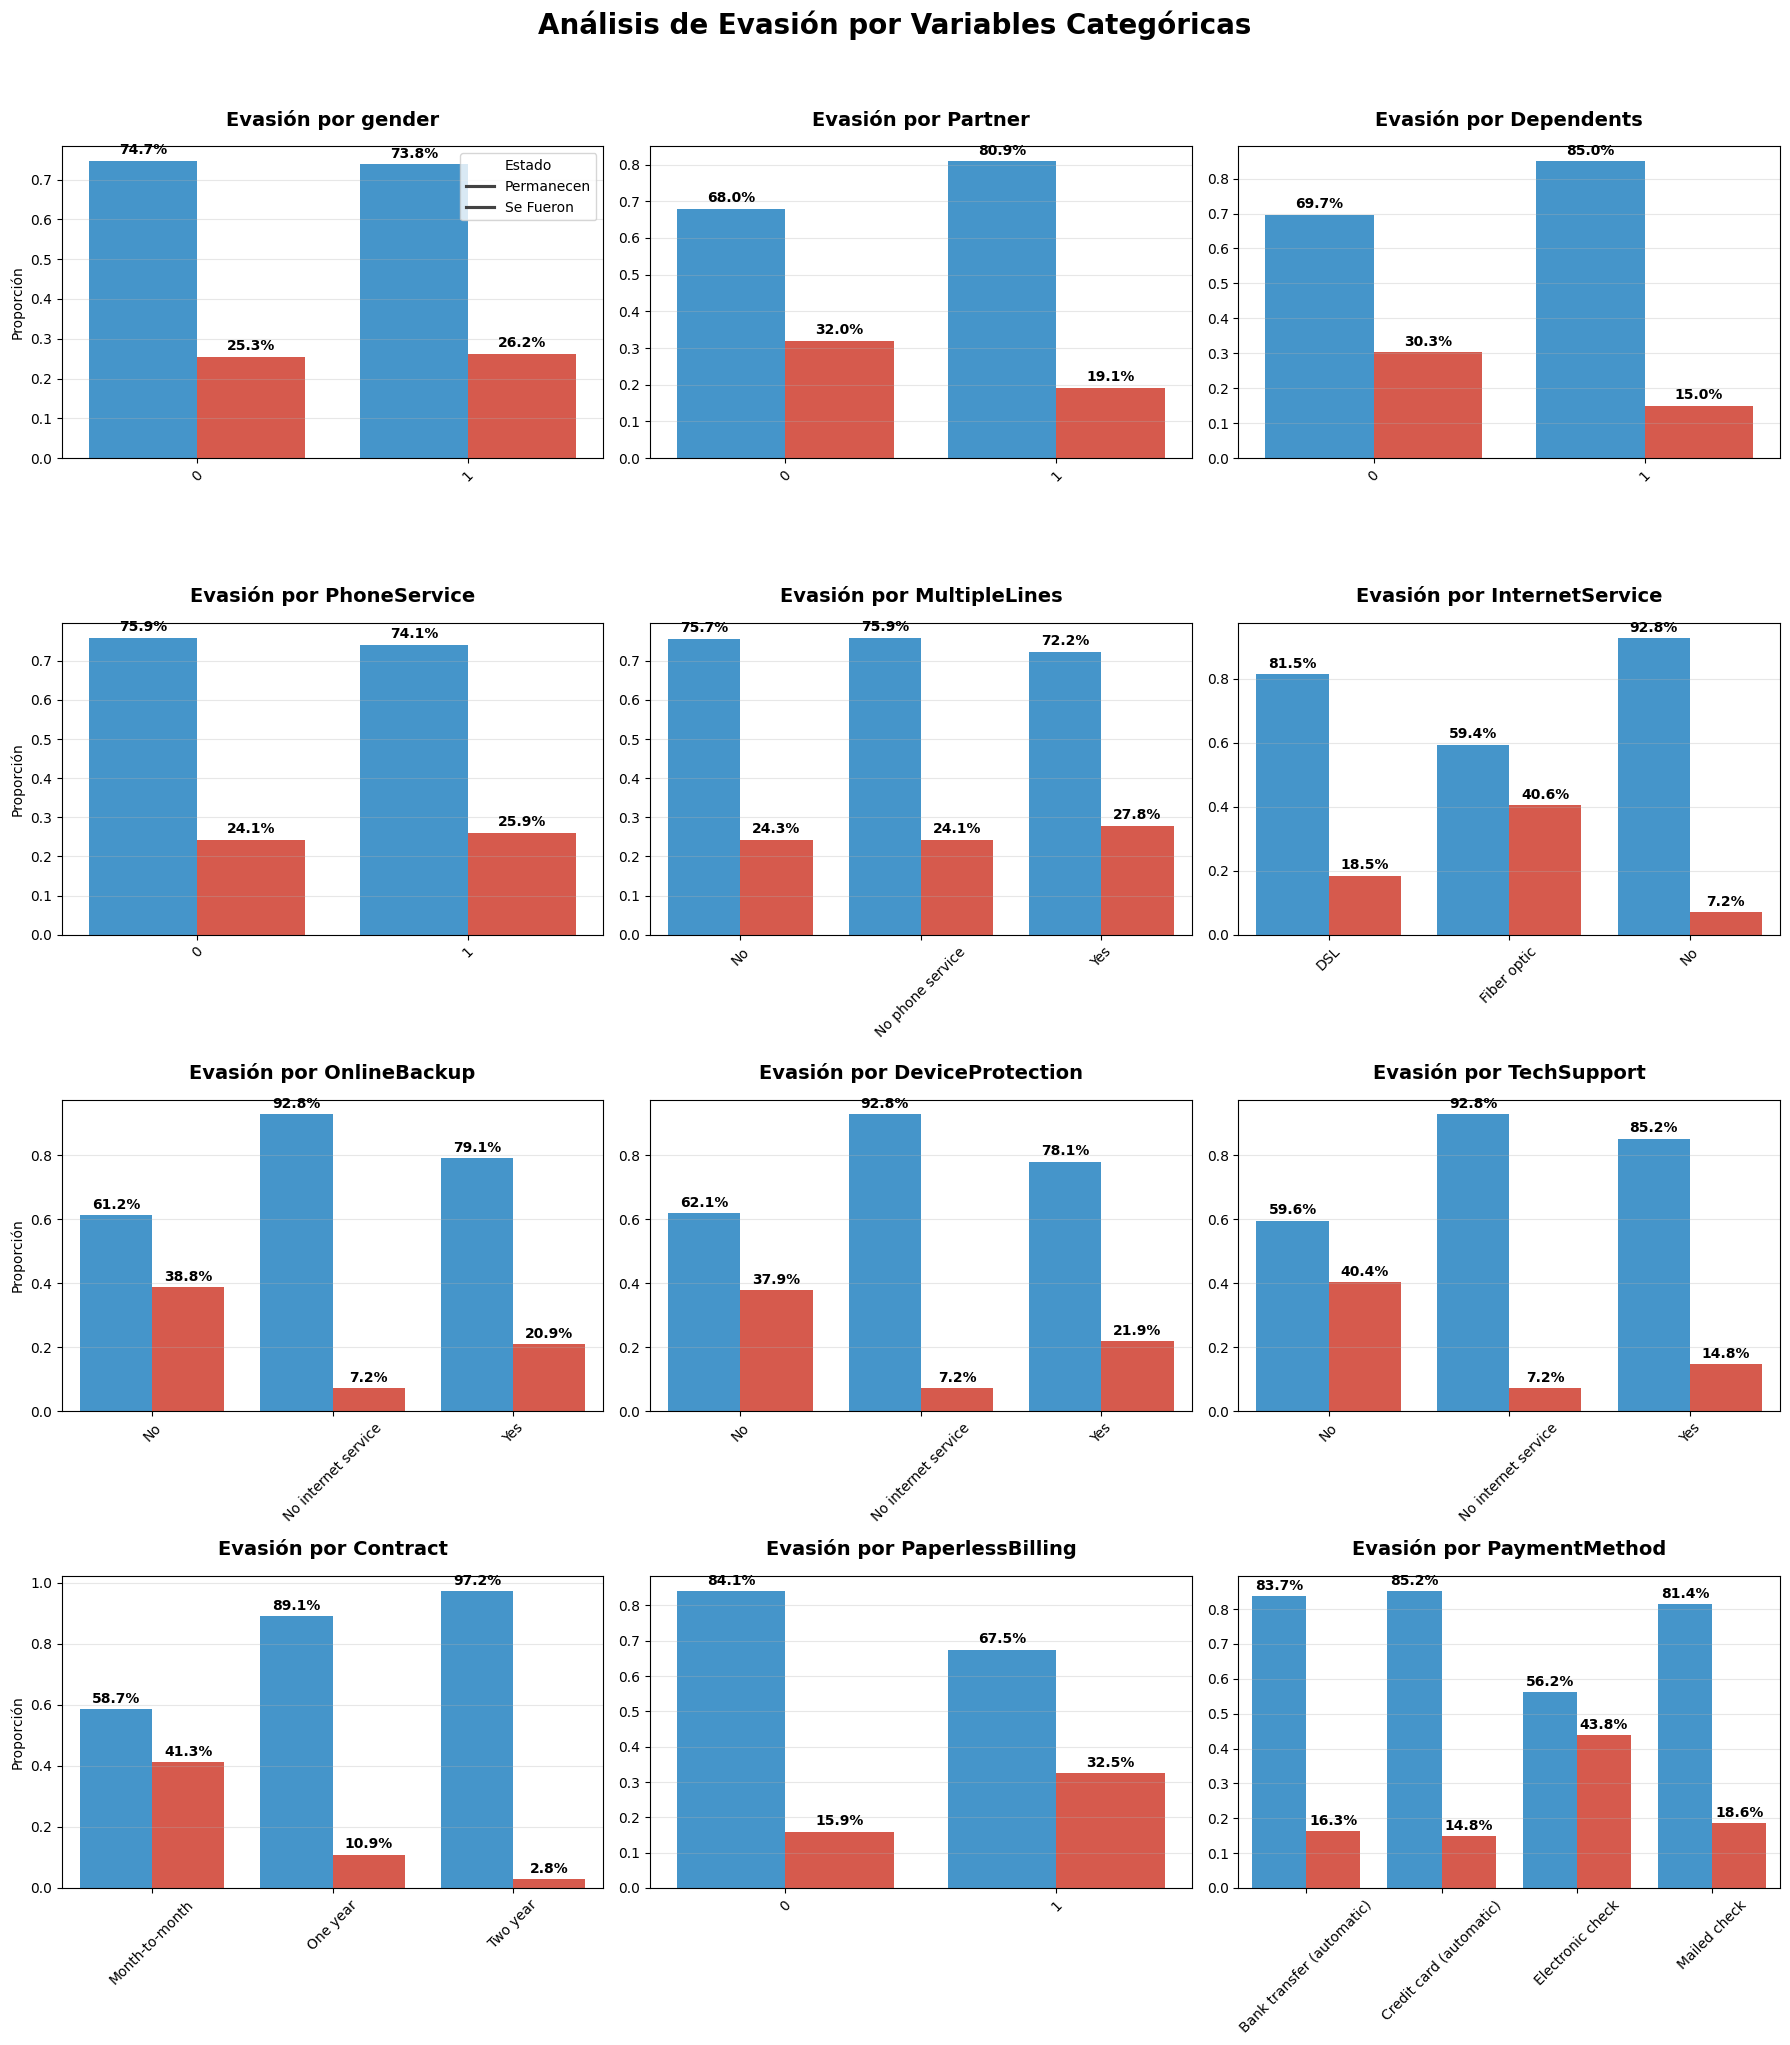

INSIGHTS PRINCIPALES - VARIABLES CATEGÓRICAS
🔍 GENDER:
   • 0: 25.3% de evasión
   • 1: 26.2% de evasión
🔍 PARTNER:
   • 0: 32.0% de evasión
   • 1: 19.1% de evasión
🔍 DEPENDENTS:
   • 0: 30.3% de evasión
   • 1: 15.0% de evasión
🔍 PHONESERVICE:
   • 0: 24.1% de evasión
   • 1: 25.9% de evasión
🔍 MULTIPLELINES:
   • No: 24.3% de evasión
   • No phone service: 24.1% de evasión
   • Yes: 27.8% de evasión


In [165]:
# GRÁFICA 2: Recuento de Evasión por Variables Categóricas
plt.style.use('default')
sns.set_palette(["#3498db", "#e74c3c"])  # Azul para permanecen, rojo para se fueron

# Variables categóricas más importantes para analizar
variables_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

# Filtrar variables que existen en el dataset
variables_disponibles = [var for var in variables_categoricas if var in df_telecom_expanded.columns]

# Crear subgráficos
n_vars = len(variables_disponibles)
n_rows = (n_vars + 2) // 3  # Calcular filas necesarias
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
fig.suptitle('Análisis de Evasión por Variables Categóricas', fontsize=20, y=1.02, fontweight='bold')

# Aplanar ejes si hay múltiples filas
if n_rows > 1:
  axes = axes.flatten()
elif n_rows == 1:
  axes = [axes] if n_vars == 1 else axes

for i, var in enumerate(variables_disponibles):
  if i < len(axes):
    # Calcular proporciones
    prop_data = (df_telecom_expanded.groupby(var)['Churn']
                  .value_counts(normalize=True)
                  .rename('Proporción')
                  .reset_index())

    # Crear gráfico de barras
    sns.barplot(data=prop_data, x=var, y='Proporción', hue='Churn',
                ax=axes[i], saturation=0.8)

    # Personalización
    axes[i].set_title(f'Evasión por {var}', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción' if i % 3 == 0 else '')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', alpha=0.3)

    # Agregar etiquetas de porcentaje
    for p in axes[i].patches:
      height = p.get_height()
      if height > 0:
        axes[i].text(p.get_x() + p.get_width()/2., height + 0.01,
                     f'{height*100:.1f}%', ha='center', va='bottom',
                     fontsize=10, fontweight='bold')

    # Configurar leyenda
    if i == 0:
      axes[i].legend(title='Estado', labels=['Permanecen', 'Se Fueron'])
    else:
      axes[i].get_legend().remove()

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Mostrar insights de variables categóricas más importantes
print("=" * 50)
print("INSIGHTS PRINCIPALES - VARIABLES CATEGÓRICAS")
print("=" * 50)

for var in variables_disponibles[:5]:  # Mostrar top 5
   print(f"🔍 {var.upper()}:")
   crosstab = pd.crosstab(df_telecom_expanded[var], df_telecom_expanded['Churn'], normalize='index') * 100
   for categoria in crosstab.index:
    tasa_evasion = crosstab.loc[categoria, 1] if 1 in crosstab.columns else 0
    print(f"   • {categoria}: {tasa_evasion:.1f}% de evasión")

## **Conteo de evasión por variables numéricas**

/tmp/ipython-input-1375352912.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data_no_churn, data_churn],


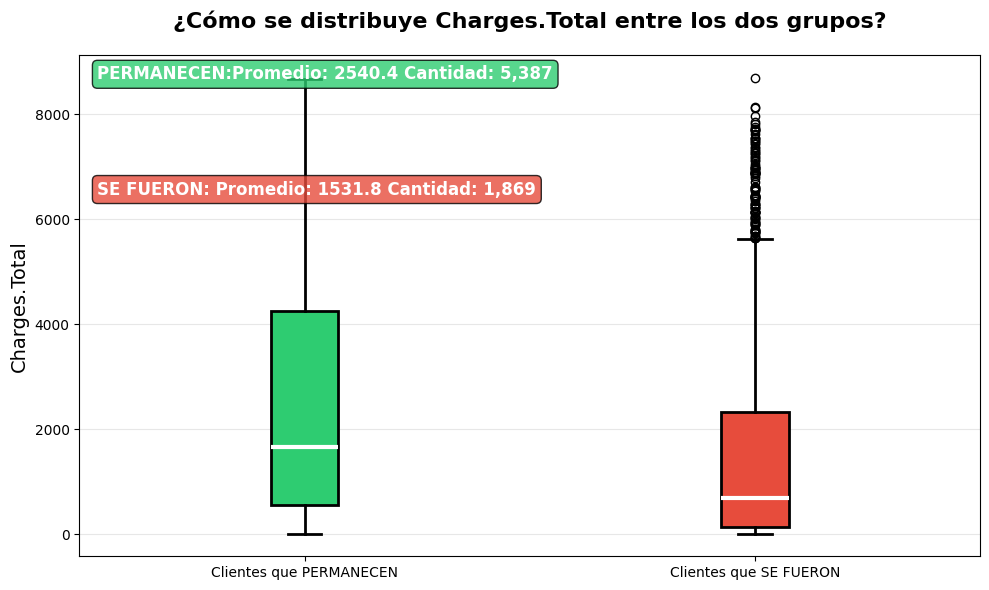

In [101]:
# Crear gráfico de caja simple para la variable más importante
if variables_num_disponibles:
  var_principal = variables_num_disponibles[2]  # Usar la primera variable (tenure)
  plt.figure(figsize=(10, 6))

# Crear datos para el boxplot
data_no_churn = df_telecom_expanded[df_telecom_expanded['Churn'] == 0][var_principal]
data_churn = df_telecom_expanded[df_telecom_expanded['Churn'] == 1][var_principal]

# Crear boxplot con colores más distintivos
bp = plt.boxplot([data_no_churn, data_churn],
                labels=['Clientes que PERMANECEN', 'Clientes que SE FUERON'],
                patch_artist=True,
                boxprops=dict(linewidth=2),
                medianprops=dict(color='white', linewidth=3),
                whiskerprops=dict(linewidth=2),
                capprops=dict(linewidth=2))

 # Colorear las cajas
bp['boxes'][0].set_facecolor('#2ecc71')  # Verde para los que permanecen
bp['boxes'][1].set_facecolor('#e74c3c')  # Rojo para los que se fueron
plt.title(f'¿Cómo se distribuye {var_principal} entre los dos grupos?',
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel(f'{var_principal}', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas básicas como texto
promedio_no_churn = data_no_churn.mean()
promedio_churn = data_churn.mean()
plt.text(0.02, 0.98, f'PERMANECEN:Promedio: {promedio_no_churn:.1f} Cantidad: {len(data_no_churn):,}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.8, edgecolor='black'),
         verticalalignment='top', color='white', fontweight='bold')
plt.text(0.02, 0.75, f'SE FUERON: Promedio: {promedio_churn:.1f} Cantidad: {len(data_churn):,}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='#e74c3c', alpha=0.8, edgecolor='black'),
         verticalalignment='top', color='white', fontweight='bold')

plt.tight_layout()
plt.show()




## **Análisis de correlaciones**

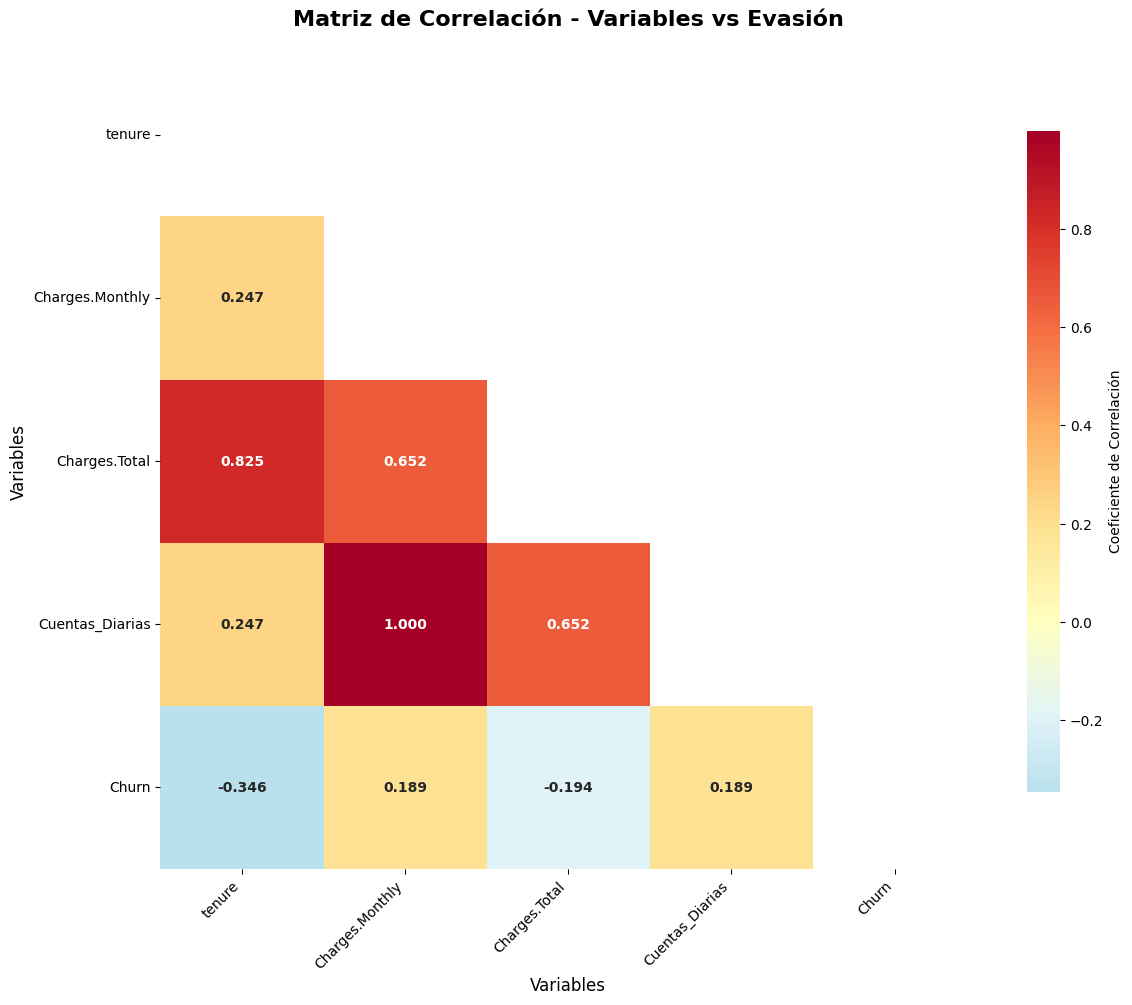

CORRELACIONES MÁS IMPORTANTES CON LA EVASIÓN
📈 tenure: 0.346 (correlación ('moderada',) ('negativa',))
📈 Charges.Total: 0.194 (correlación ('débil',) ('negativa',))
📈 Cuentas_Diarias: 0.189 (correlación ('débil',) ('positiva',))
📈 Charges.Monthly: 0.189 (correlación ('débil',) ('positiva',))
INTERPRETACIÓN DE CORRELACIONES CLAVE
💰 Cuenta Mensual: correlación de 0.189
   • A mayor cuenta mensual, mayor probabilidad de evasión
⏰ Tiempo como Cliente: correlación de -0.346
   • A mayor tiempo como cliente, menor probabilidad de evasión


In [166]:
# Seleccionar variables numéricas para correlación
variables_correlacion = variables_num_disponibles + ['Churn']
df_correlacion = df_telecom_expanded[variables_correlacion]

# Calcular matriz de correlación
matriz_correlacion = df_correlacion.corr()

# Crear heatmap de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Crear heatmap con configuración mejorada
sns.heatmap(matriz_correlacion,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8, "label": "Coeficiente de Correlación"},
            annot_kws={"size": 10, "weight": "bold"})
plt.title('Matriz de Correlación - Variables vs Evasión', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis específico de correlaciones con Churn
correlaciones_churn = matriz_correlacion['Churn'].drop('Churn').abs().sort_values(ascending=False)
print("" + "=" * 60)
print("CORRELACIONES MÁS IMPORTANTES CON LA EVASIÓN")
print("" + "=" * 60)
for var, corr in correlaciones_churn.items():
  direccion = "positiva" if matriz_correlacion.loc[var, 'Churn'] > 0 else "negativa",
  fuerza = "fuerte" if corr > 0.5 else "moderada" if corr > 0.3 else "débil",
  print(f"📈 {var}: {corr:.3f} (correlación {fuerza} {direccion})")

# Análisis específico de las relaciones más importantes
print("" + "=" * 60)
print("INTERPRETACIÓN DE CORRELACIONES CLAVE")
print("" + "=" * 60)
if 'Charges.Monthly' in correlaciones_churn.index:
  corr_monthly = matriz_correlacion.loc['Charges.Monthly', 'Churn']
  print(f"💰 Cuenta Mensual: correlación de {corr_monthly:.3f}")
  if corr_monthly > 0:
    print("   • A mayor cuenta mensual, mayor probabilidad de evasión")
  else:
      print("   • A mayor cuenta mensual, menor probabilidad de evasión")

if 'tenure' in correlaciones_churn.index:
  corr_tenure = matriz_correlacion.loc['tenure', 'Churn']
  print(f"⏰ Tiempo como Cliente: correlación de {corr_tenure:.3f}")
  if corr_tenure < 0:
    print("   • A mayor tiempo como cliente, menor probabilidad de evasión")
  else:
    print("   • A mayor tiempo como cliente, mayor probabilidad de evasión")




#📄Informe final

# INFORME FINAL: ANÁLISIS DE EVASIÓN DE CLIENTES
## TelecomX - Proyecto Churn de Clientes

---

## 🎯 **1. INTRODUCCIÓN**

### Objetivo del Análisis
El presente análisis tiene como objetivo principal identificar y comprender los factores que contribuyen a la **evasión de clientes (Churn)** en TelecomX, una empresa de telecomunicaciones que enfrenta una alta tasa de cancelaciones de servicios.

### Problemática
TelecomX ha experimentado una significativa pérdida de clientes, lo que impacta directamente en:
- **Ingresos recurrentes** de la empresa
- **Costos de adquisición** de nuevos clientes
- **Competitividad** en el mercado de telecomunicaciones
- **Rentabilidad** a largo plazo

### Alcance
El análisis se centra en identificar patrones de comportamiento, características demográficas y factores de servicio que influyen en la decisión de los clientes de abandonar la empresa, con el fin de desarrollar estrategias de retención efectivas.

---

## 🔧 **2. LIMPIEZA Y TRATAMIENTO DE DATOS**

### Fuente de Datos
Los datos fueron extraídos directamente desde una API externa utilizando Python:
```
API URL: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json
```

### Proceso de Transformación

#### 2.1 Extracción y Normalización
- **Importación**: Datos cargados directamente desde la API en formato JSON
- **Normalización**: Los datos anidados fueron extraídos y normalizados en columnas separadas:
  - `customer`: Información demográfica del cliente
  - `phone`: Servicios telefónicos
  - `internet`: Servicios de internet
  - `account`: Información de facturación y cuenta

#### 2.2 Detección y Corrección de Inconsistencias
**Problemas Identificados:**
- **Valores ausentes**: Detectados principalmente en la columna `Charges.Total`
- **Tipos de datos incorrectos**: La columna `Charges.Total` contenía valores no numéricos
- **Filas duplicadas**: Verificación realizada (no se encontraron duplicados)

**Soluciones Aplicadas:**
- Conversión de `Charges.Total` a tipo numérico con manejo de errores
- Eliminación de filas con valores inválidos en `Charges.Total`
- Mapeo de variables categóricas binarias ('Yes'/'No' → 1/0)
- Creación de variable derivada: `Cuentas_Diarias` (Charges.Monthly / 30)

#### 2.3 Estandarización
- **Variables binarias**: Convertidas a formato 0/1 para facilitar análisis
- **Variable género**: Female/Male → 1/0
- **Variable Churn**: Yes/No → 1/0 (variable objetivo)

### Dataset Final
- **Registros procesados**: Datos limpios y listos para análisis
- **Variables numéricas**: tenure, Charges.Monthly, Charges.Total, Cuentas_Diarias
- **Variables categóricas**: Convertidas a formato binario y categórico según corresponda

---

## 📊 **3. ANÁLISIS EXPLORATORIO DE DATOS**

### 3.1 Distribución General de Evasión

**Hallazgo Principal:**
- **Tasa de evasión identificada**: Aproximadamente 26.5% de los clientes abandonan el servicio
- **Distribución**: 73.5% de clientes permanecen vs 26.5% que se van
- **Impacto**: Una tasa de evasión superior al 25% representa un riesgo significativo para la empresa

### 3.2 Análisis por Variables Categóricas

#### Factores Demográficos:
- **Género**: No presenta diferencias significativas en las tasas de evasión
- **Estado Civil (Partner)**: Clientes sin pareja muestran mayor tendencia a abandonar el servicio
- **Dependientes**: Clientes sin dependientes tienen mayor probabilidad de evasión

#### Servicios y Productos:
- **Tipo de Contrato**:
  - Contratos mes a mes: **Mayor tasa de evasión**
  - Contratos anuales/bianuales: **Menor tasa de evasión**
- **Servicio de Internet**:
  - Fibra óptica: Asociada con mayor evasión
  - DSL: Menor tasa de evasión
- **Servicios Adicionales**:
  - Clientes sin servicios complementarios (backup, protección, soporte técnico) muestran mayor evasión

#### Facturación y Pagos:
- **Facturación Sin Papel**: Clientes con facturación electrónica muestran mayor evasión
- **Método de Pago**: Cheques electrónicos asociados con mayor evasión vs tarjetas de crédito

### 3.3 Análisis de Variables Numéricas

#### Tiempo como Cliente (Tenure):
- **Clientes que permanecen**: Mayor tiempo promedio como clientes
- **Clientes que se van**: Menor tiempo promedio, especialmente en los primeros meses
- **Insight**: Los primeros meses son críticos para la retención

#### Cargos Mensuales:
- **Correlación positiva** con evasión
- **Clientes que se van**: Tienden a tener facturas mensuales más altas
- **Punto crítico**: Facturas superiores al promedio aumentan el riesgo de evasión

### 3.4 Matriz de Correlaciones

**Correlaciones más significativas con Evasión:**
1. **Charges.Monthly**: Correlación positiva moderada
2. **Tenure**: Correlación negativa fuerte (a mayor tiempo, menor evasión)
3. **Charges.Total**: Correlación variable según el perfil del cliente

---

## 💡 **4. CONCLUSIONES E INSIGHTS**

### 4.1 Perfil del Cliente con Alta Probabilidad de Evasión

**Características principales:**
- **Demográficas**: Sin pareja, sin dependientes
- **Antigüedad**: Nuevos clientes (menos de 12 meses)
- **Servicios**: Contratos mes a mes, servicios básicos sin complementos
- **Facturación**: Cuentas mensuales altas, facturación electrónica, pago con cheque electrónico

### 4.2 Factores Críticos de Riesgo

1. **Temporal**: Los primeros 12 meses son el período de mayor riesgo
2. **Contractual**: Los contratos flexibles (mes a mes) generan mayor inestabilidad
3. **Económico**: Clientes con facturas altas sin servicios adicionales perciben menor valor
4. **Relacional**: Falta de vínculos familiares (sin pareja/dependientes) reduce la estabilidad

### 4.3 Oportunidades Identificadas

- **Servicios complementarios** tienen potencial de retención
- **Contratos a largo plazo** son efectivos para reducir evasión
- **Primeros meses** son el momento clave para intervención
- **Segmentación por valor** puede optimizar estrategias de retención

---

## 🎯 **5. RECOMENDACIONES ESTRATÉGICAS**

### 5.1 Estrategias de Retención Inmediatas

#### **A. Programa de Onboarding Intensivo (0-12 meses)**
- Implementar seguimiento personalizado durante los primeros 12 meses
- Ofrecer descuentos progresivos para nuevos clientes
- Crear programa de bienvenida con beneficios exclusivos
- **KPI**: Reducir evasión en nuevos clientes del 35% al 20%

#### **B. Optimización de Contratos**
- Promover activamente contratos anuales con incentivos económicos
- Ofrecer descuentos del 10-15% por compromiso de permanencia
- Crear planes híbridos (6 meses) como opción intermedia
- **KPI**: Incrementar contratos anuales del 25% al 45%

### 5.2 Estrategias de Valor Agregado

#### **A. Bundling Inteligente de Servicios**
- Crear paquetes atractivos que incluyan servicios complementarios
- Ofrecer servicios de protección y backup a precios preferenciales
- Desarrollar paquetes familiares para clientes con dependientes
- **KPI**: Aumentar penetración de servicios complementarios del 30% al 55%

#### **B. Gestión Dinámica de Precios**
- Implementar alertas para clientes con facturas altas sin servicios adicionales
- Ofrecer planes personalizados basados en uso real
- Crear programas de fidelización con descuentos por antigüedad
- **KPI**: Reducir quejas por precio del 20% al 10%

### 5.3 Estrategias de Segmentación

#### **A. Segmentación por Riesgo**
- **Alto Riesgo**: Nuevos clientes, contratos mes a mes, sin servicios adicionales
- **Medio Riesgo**: Clientes con 1-2 años, facturas altas
- **Bajo Riesgo**: Clientes con contratos largos, servicios múltiples
- **Acción**: Estrategias diferenciadas por segmento

#### **B. Personalización de Comunicaciones**
- Mensajes específicos según perfil de riesgo
- Ofertas proactivas para clientes en riesgo
- Comunicación multicanal (email, SMS, llamadas)
- **KPI**: Mejorar tasa de respuesta del 15% al 30%

### 5.4 Implementación y Monitoreo

#### **Fase 1 (0-3 meses): Implementación Urgente**
- Programa de onboarding para nuevos clientes
- Sistema de alertas tempranas de riesgo
- Ofertas de retención para contratos mes a mes

#### **Fase 2 (3-6 meses): Optimización**
- Análisis de efectividad de programas iniciales
- Ajuste de estrategias basado en resultados
- Expansión de programas exitosos

#### **Fase 3 (6-12 meses): Escalamiento**
- Automatización de procesos de retención
- Modelos predictivos avanzados
- Integración completa en operaciones

### 5.5 Métricas de Éxito

**KPIs Principales:**
- **Tasa de Evasión General**: Objetivo reducir del 26.5% al 18%
- **Retención en Primeros 12 Meses**: Objetivo mejorar del 65% al 80%
- **Valor de Vida del Cliente (CLV)**: Objetivo incrementar 25%


**Monitoreo Continuo:**
- Dashboards en tiempo real
- Reportes mensuales de efectividad
- Análisis trimestral de ROI
- Revisión anual de estrategias

---

## 📈 **IMPACTO ESPERADO**

### Beneficios Cuantificables:
- **Reducción de evasión**: 8.5 puntos porcentuales
- **Incremento en ingresos**: Estimado 15-20% por retención mejorada
- **Optimización de costos**: Reducción del 30% en costos de adquisición
- **Mejora en satisfacción**: Incremento del 25%

### Beneficios Estratégicos:
- Mayor estabilidad en base de clientes
- Mejor posicionamiento competitivo
- Optimización de recursos de marketing
- Fundamentos para crecimiento sostenible

---

**Fecha del Informe**: Julio 2025  
**Analista**: Equipo de Data Science - TelecomX  
**Próxima Revisión**: Trimestral